# Exploratory data analysis of the consolidated reviewer data

In [1]:
import pandas as pd
import seaborn as sns
from operator import itemgetter
import matplotlib.pyplot as plt

In [2]:
reviewer_df = pd.read_csv("../Processed_Data/reviewer_data.csv")
ratings = [1,2,3,4,5]
rating_columns = ['1*','2*','3*','4*','5*']

In [3]:
reviewer_df.head(3)

,reviewerID,1*,2*,3*,4*,5*,activity,avg_rating,std_reviews,active_reviewer
0,A0009674W2SIW8AIECUF,0,0,0,0,2,2,5.0,0.0,False
1,A0010028HGBTWSS5F8J6,0,0,0,0,1,1,5.0,0.0,False
2,A0011110I4YVY1W3WC02,0,0,0,0,5,5,5.0,0.0,False


In [8]:
num_reviewers = reviewer_df.shape[0]
num_reviewers

43531850

In [4]:
# some notation here
def get_aggregate_reviewer_info_by_activity(activity=None, greater_than=False):
    relevant_reviewers = reviewer_df
    if activity and greater_than:
        relevant_reviewers = reviewer_df.query('activity >= @activity')
    elif activity:
        relevant_reviewers = reviewer_df.query('activity == @activity')
     
    reviewer_count = relevant_reviewers.shape[0]

    rating_distribution = relevant_reviewers[rating_columns].sum()
    # calculate average from the rating distribution
    rating_total = 0
    total_num_ratings = 0
    
    for rating, rating_column in zip(ratings, rating_columns):
        rating_total += rating * rating_distribution[rating_column]
        total_num_ratings += rating_distribution[rating_column]
    average_rating = rating_total / total_num_ratings

    # normalize, add some other information
    review_count = rating_distribution.sum()
    rating_distribution[rating_columns] = rating_distribution[rating_columns] / review_count
    rating_distribution['average_rating'] = average_rating
    rating_distribution['review_count'] = review_count
    rating_distribution['reviewer_count'] = reviewer_count

    return rating_distribution

## Visualize reviewer information grouped by activity

In [9]:
info_by_activity_group = pd.DataFrame(columns=["activity_group", "average_rating", "reviewer_count", "reviewer_proportion"])
for activity in range(1,50):
    aggregate_reviewer_info_by_activity = get_aggregate_reviewer_info_by_activity(activity)
    average_rating, reviewer_count = itemgetter(['average_rating', 'reviewer_count'])(aggregate_reviewer_info_by_activity)
    
    average_rating = aggregate_reviewer_info_by_activity['average_rating']
    
    info_by_activity_group.loc[activity] = {
        'activity_group': activity,
        'average_rating': average_rating,
        'reviewer_count': reviewer_count,
        'reviewer_proportion': reviewer_count / num_reviewers
    }

## See general proportion of each activity grouping

Text(0.5, 0, 'Number of Reviews Given')

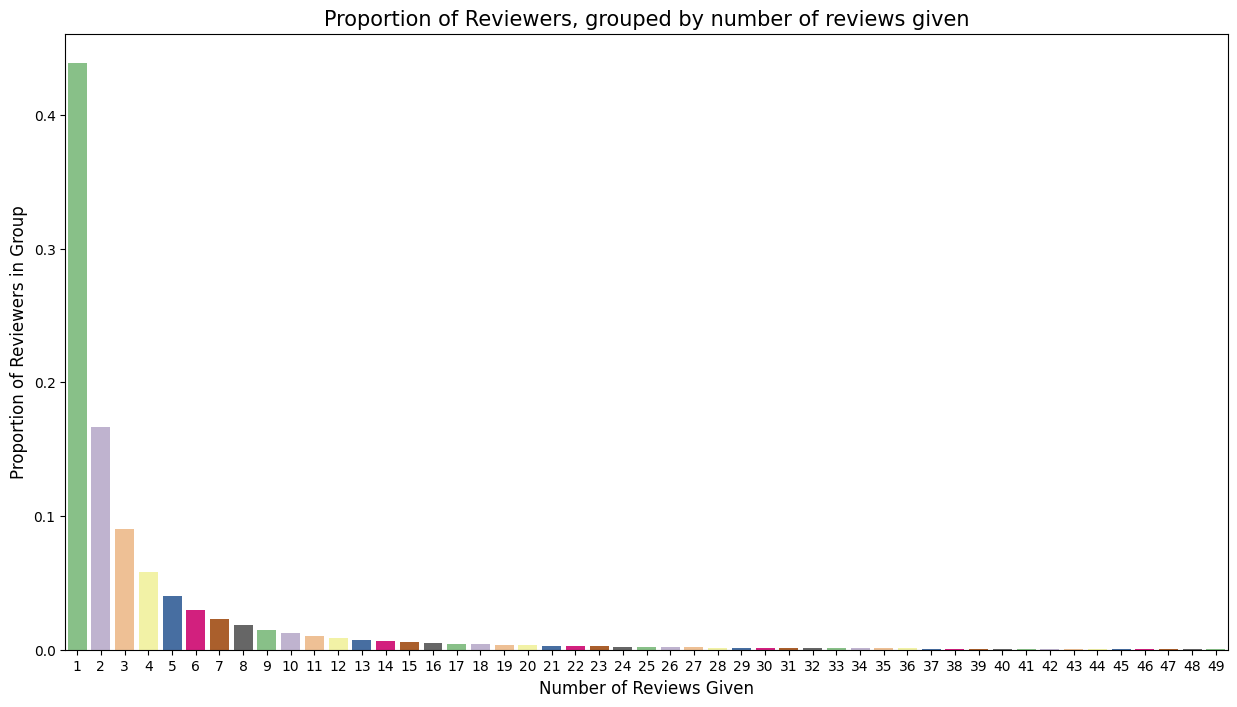

In [42]:
label_fontsize = 12
plt.figure(figsize=(15,8))
sns.barplot(x=info_by_activity_group['activity_group'], y=info_by_activity_group['reviewer_proportion'], palette="Accent")
# plt.xlim(-1,30)
plt.title("Proportion of Reviewers, grouped by number of reviews given", fontsize=15)
plt.ylabel("Proportion of Reviewers in Group", fontsize=label_fontsize)
plt.xlabel("Number of Reviews Given", fontsize=label_fontsize)

## See how the average rating changes by reviewer activity

Text(0.5, 0, 'Number of Reviews Given')

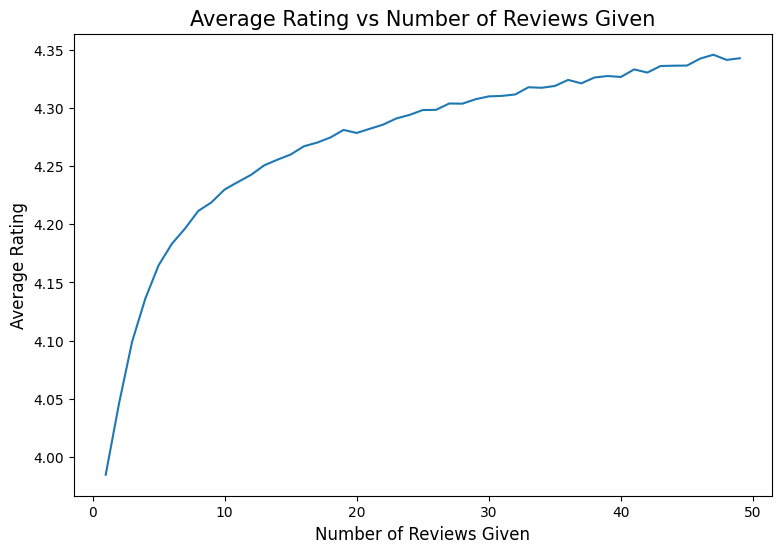

In [51]:
plt.figure(figsize=(9,6))
sns.lineplot(data=info_by_activity_group, x='activity_group', y='average_rating')
plt.title("Average Rating vs Number of Reviews Given", fontsize=15)
plt.ylabel("Average Rating", fontsize=label_fontsize)
plt.xlabel("Number of Reviews Given", fontsize=label_fontsize)

In [71]:
colors = ['#ff0000','#ffa700','#fff400','#a3ff00','#2cba00'] # basically red -> green

def display_aggregate_reviewer_info(activity=None, greater_than=False):
    aggregate_reviewer_info = get_aggregate_reviewer_info_by_activity(activity, greater_than)
    review_count = aggregate_reviewer_info['review_count']
    average_rating = aggregate_reviewer_info['average_rating']
    ax = sns.barplot(x=rating_columns, y=aggregate_reviewer_info[rating_columns].round(4), palette=colors)
    ax.bar_label(ax.containers[0])
    plt.ylabel(f"Rating Proportion (n={review_count})")
    plt.xlabel(f"Rating Given (average={average_rating:.3f})")
    plus = "+" if greater_than else ""
    title = "Overall Rating Distribution" if activity == None else f"Rating Distribution of Reviewers with {activity}{plus} Review(s) Given"
    
    plt.title(title)    
    plt.ylim(0,1)
    plt.show()

## Look at individual distributions, grouped by activity

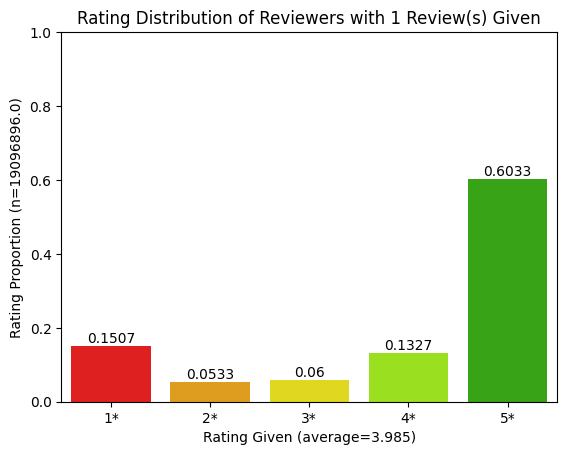

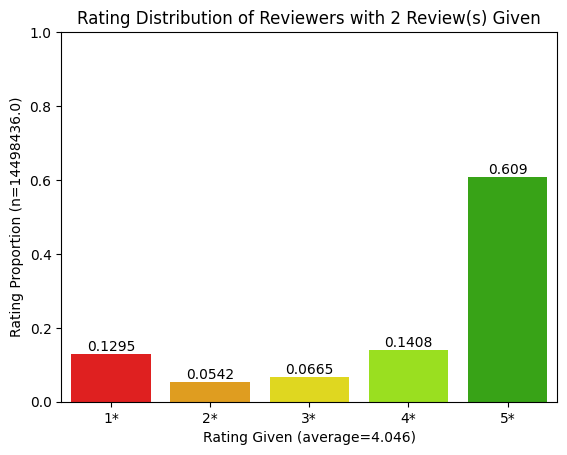

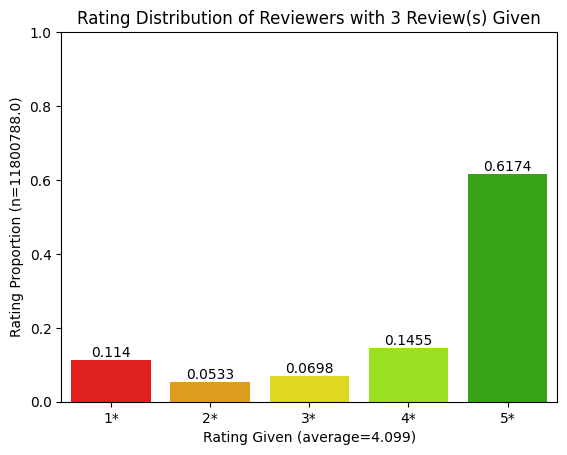

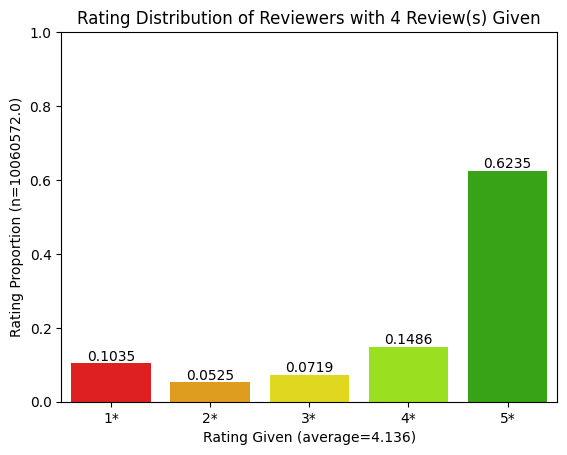

In [73]:
# the average review tends to go up with the number of reviews
for i in range(1,5):
    display_aggregate_reviewer_info(i)